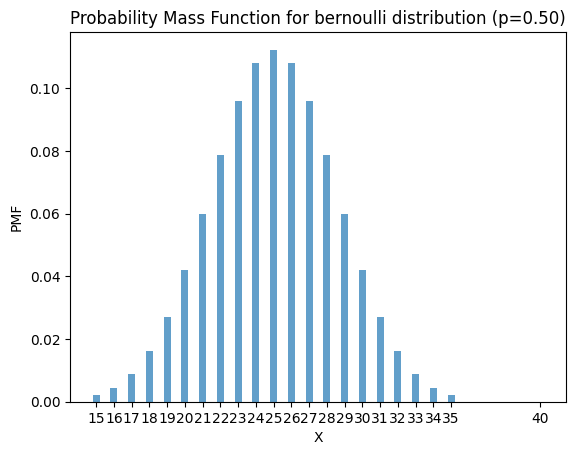

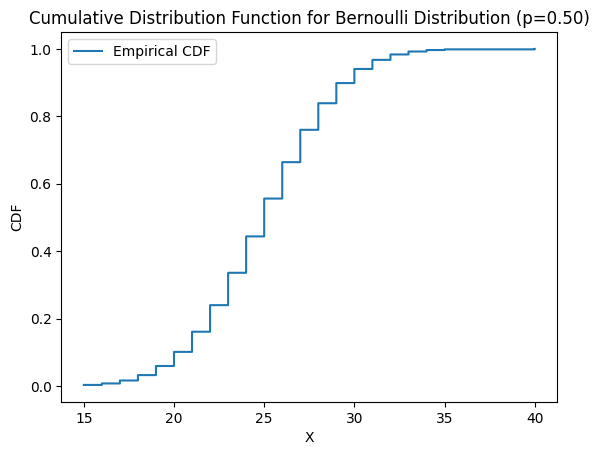

For p=0.5, n=50:
Expectation (Mean): 25.0
Variance: 12.5


<Figure size 640x480 with 0 Axes>

For p=0.1, n=40:
Expectation (Mean): 4.0
Variance: 3.6
For p=0.5, n=40:
Expectation (Mean): 20.0
Variance: 10.0
For p=0.9, n=40:
Expectation (Mean): 36.0
Variance: 3.599999999999999


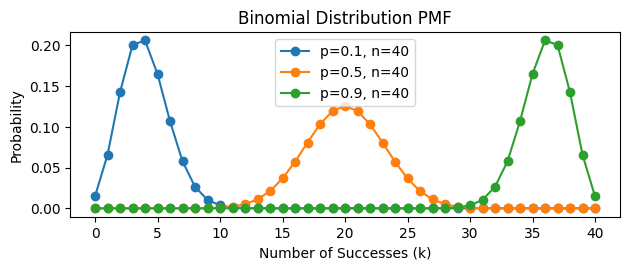

For p=0.5, n=5:
Expectation (Mean): 2.5
Variance: 1.25
For p=0.5, n=50:
Expectation (Mean): 25.0
Variance: 12.5
For p=0.5, n=100:
Expectation (Mean): 50.0
Variance: 25.0


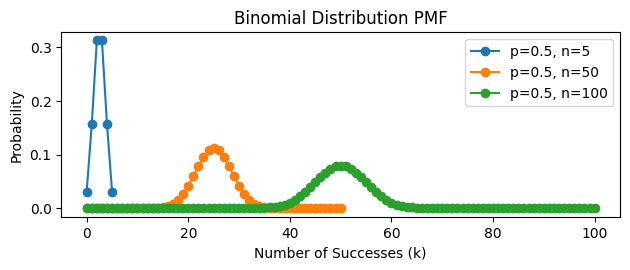

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from math import comb

#Generate binomial random variables
def generate_binomial(n, p, size):
    random_variables = []  # Initialize an empty list to store generated random variables
    for _ in range(size):  # Loop 'size' times to generate the specified number of random variables
        successes = sum(1 for _ in range(n) if random.random() <= p)  # Count the number of successes in n trials
        random_variables.append(successes)  # Add the number of successes to the list
    return random_variables  # Return the list of generated random variables

# Function to calculate binomial PMF
def binomial_pmf(k, n, p):
    return comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

# Function to calculate binomial CDF
def binomial_cdf(k, n, p):
    cdf_value = 0
    for i in range(k + 1):
        cdf_value += comb(n, i) * (p ** i) * ((1 - p) ** (n - i))
    return cdf_value

# Function to calculate binomial expectation (mean)
def binomial_expectation(n, p):
    return n * p

# Function to calculate binomial variance
def binomial_variance(n, p):
    return n * p * (1 - p)

#For binomial random variable modelling (x -> p and y-> n) where p is prob of success and n is number of trials
parametersx = [(0.5, 50)]

#For binomial random variable modelling with fixed n and different p 
parametersy = [(0.1, 40), (0.5, 40), (0.9, 40)]

#For binomail random variable modelling with fixed p and different n
parametersz = [(0.5, 5), (0.5, 50), (0.5, 100)]

#Access parametersx
for p, n in parametersx:
    # Generate 1000 random binomial variables and put size to 1000
    size = 1000
    binomial_random_variables = generate_binomial(n, p, size)

    #Get the unique values in generated binomial variables
    unique_values, counts = np.unique(binomial_random_variables, return_counts=True)

    #Store pmf values by iterating through the unique_values
    pmf_values = [binomial_pmf(k, n, p) for k in unique_values]

    #Sort numbers generated in binomial random variables
    x_ecdf = np.sort(binomial_random_variables)

    #Store cdf values by iterating through the x_ecdf
    y_ecdf = [binomial_cdf(k, n, p) for k in x_ecdf]


    # Calculate expectation and variance using generated data
    expectation = binomial_expectation(n, p)
    variance = binomial_variance(n, p)

    # Plot PMF where unique values -> x-axis and pmf_values -> y-axis
    plt.bar(unique_values, pmf_values, align='center', alpha=0.7, width=0.4)
    plt.xticks(unique_values)
    plt.xlabel('X')
    plt.ylabel('PMF')
    plt.title(f'Probability Mass Function for bernoulli distribution (p={p:.2f})')
    plt.show()

    #plot CDF where x_ecdf -> x-axis and y_ecdf -> y-axis
    plt.step(x_ecdf, y_ecdf, where='post', label='Empirical CDF')
    plt.title(f'Cumulative Distribution Function for Bernoulli Distribution (p={p:.2f})')
    plt.xlabel('X')
    plt.ylabel('CDF')
    plt.legend()
    plt.show()

    # Print expectation and variance
    print(f"For p={p}, n={n}:")
    print(f"Expectation (Mean): {expectation}")
    print(f"Variance: {variance}")

    plt.tight_layout()
    plt.show()


#access parametersy
for p, n in parametersy:

    #generate list of size number of trials and calculate pmf, expectation and variance for each value
    k_values = np.arange(0, n+1)
    pmf_values = [binomial_pmf(k, n, p) for k in k_values]

    expectation = binomial_expectation(n, p)
    variance = binomial_variance(n, p)
    
    # Plot PMF
    plt.subplot(2, 1, 1)
    plt.plot(k_values, pmf_values, marker='o', label=f'p={p}, n={n}')
    plt.title('Binomial Distribution PMF')
    plt.xlabel('Number of Successes (k)')
    plt.ylabel('Probability')
    plt.legend()

    print(f"For p={p}, n={n}:")
    print(f"Expectation (Mean): {expectation}")
    print(f"Variance: {variance}")

plt.tight_layout()
plt.show()

#access parametersz
for p, n in parametersz:
    #generate list of size number of trials and calculate pmf, expectation and variance for each value
    k_values = np.arange(0, n+1)
    pmf_values = [binomial_pmf(k, n, p) for k in k_values]

    expectation = binomial_expectation(n, p)
    variance = binomial_variance(n, p)
    # Plot PMF
    plt.subplot(2, 1, 1)
    plt.plot(k_values, pmf_values, marker='o', label=f'p={p}, n={n}')
    plt.title('Binomial Distribution PMF')
    plt.xlabel('Number of Successes (k)')
    plt.ylabel('Probability')
    plt.legend()

    print(f"For p={p}, n={n}:")
    print(f"Expectation (Mean): {expectation}")
    print(f"Variance: {variance}")

    
    

plt.tight_layout()
plt.show()